Стадия I

Программа принимает на вход скорости и координаты космических объектов и рассчитывает их положение и
скорость в зависимости от времени методом численного решения уравнений Ньютона. Обоснован выбор
разностной схемы и шага интеграции, требуемая точность - 10 cм за неделю. Расчёт на GPU
Все расчёты в системе единиц СИ. Чтобы так не получилось.



В коде есть интерфейс для простого добавления новых сил, действующих на объекты. Силы могут зависеть от
времени, скорости и координат объекта, параметров объекта. В нём реализована элементарная модель
гравитации, где Земля - шар.

Есть визуализатор, для заданных id объектов и интервалу времени, рисующий их траекторию картинкой. В отчёте
есть траектории 10 случайных объектов на протяжении суток.

# Генератор входных данных

Есть код, генерирующий случайные начальные условия для 21000 объектов. Круговые орбиты, высота
распределена по Гауссу, средняя 800 км, дисперсия 200 км, плоскости - равномерно. Размеры объектов от 1 см до
10 м, распределены с pdf = 1/object_size

Формат данных для каждого обьекта

- ```object_id```
- ```position```
- ```size```
- ```motion_vector```

Допустим мы напишем генератор на python и данные по обьектам будем просто писать в csv файл.

In [8]:
import numpy as np

def randint_with_dist(pdf):
    choices = []
    for index, value in enumerate(pdf):
        choices.extend(index for _ in range(value))
    return random.choice(choices)

In [16]:
def draw_random_number_from_pdf(pdf, interval, pdfmax=1, integers=False, max_iterations=10000):
    """
    Draws a random number from given probability density function.

    Parameters
    ----------
        pdf       -- the function pointer to a probability density function of form P = pdf(x)
        interval  -- the resulting random number is restricted to this interval
        pdfmax    -- the maximum of the probability density function
        integers  -- boolean, indicating if the result is desired as integer
        max_iterations -- maximum number of 'tries' to find a combination of random numbers (rand_x, rand_y) located below the function value calc_y = pdf(rand_x).

    returns a single random number according the pdf distribution.
    """
    for i in range(max_iterations):
            if integers == True:
                rand_x = np.random.randint(interval[0], interval[1])
            else:
                # (b - a) * random_sample() + a
                rand_x = (interval[1] - interval[0]) * \
                          np.random.random(1) + interval[0]

            rand_y = pdfmax * np.random.random(1)
            calc_y = pdf(rand_x)

            if(rand_y <= calc_y):
                return rand_x

    raise Exception("Could not find a matching random number within pdf in " + max_iterations + " iterations.")

In [26]:
draw_random_number_from_pdf(lambda x: 1/x, [1.0, 10.0])

array([1.48535528])

In [32]:
def generate_object_states(object_count = 100,
                           orbit_type = 'circle', 
                           orbit_altitude_mean = 800000, 
                           orbit_altitude_var = 200000, 
                           object_min_size = 0.1, 
                           object_max_size = 10.0) -> 'list of object parameters':
    
    """Generate altitude"""
    mu, sigma, size = orbit_altitude_mean, orbit_altitude_var, object_count
    altitudes = np.random.normal(mu, sigma, size)
    
    """Generate object sizes"""
    sizes = [draw_random_number_from_pdf(lambda x: 1/x, [object_min_size, object_max_size])[0]
            for _ in range(object_count)]
    
    
    object_list = []
    for object_idx, altitude, size in zip(range(object_count), altitudes, sizes):
        object_list.append({'object_id':  object_idx,
                            'altitude': altitude, 
                            'size': size})
    return object_list

In [35]:
my_object_list = generate_object_states(21000)

In [41]:
import csv
with open('objects.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['object_id','altitude','size'])
    for space_object in my_object_list:
        spamwriter.writerow([space_object['object_id'],
                             space_object['altitude'],
                             space_object['size']])

# Визуализация

<IPython.core.display.Javascript object>


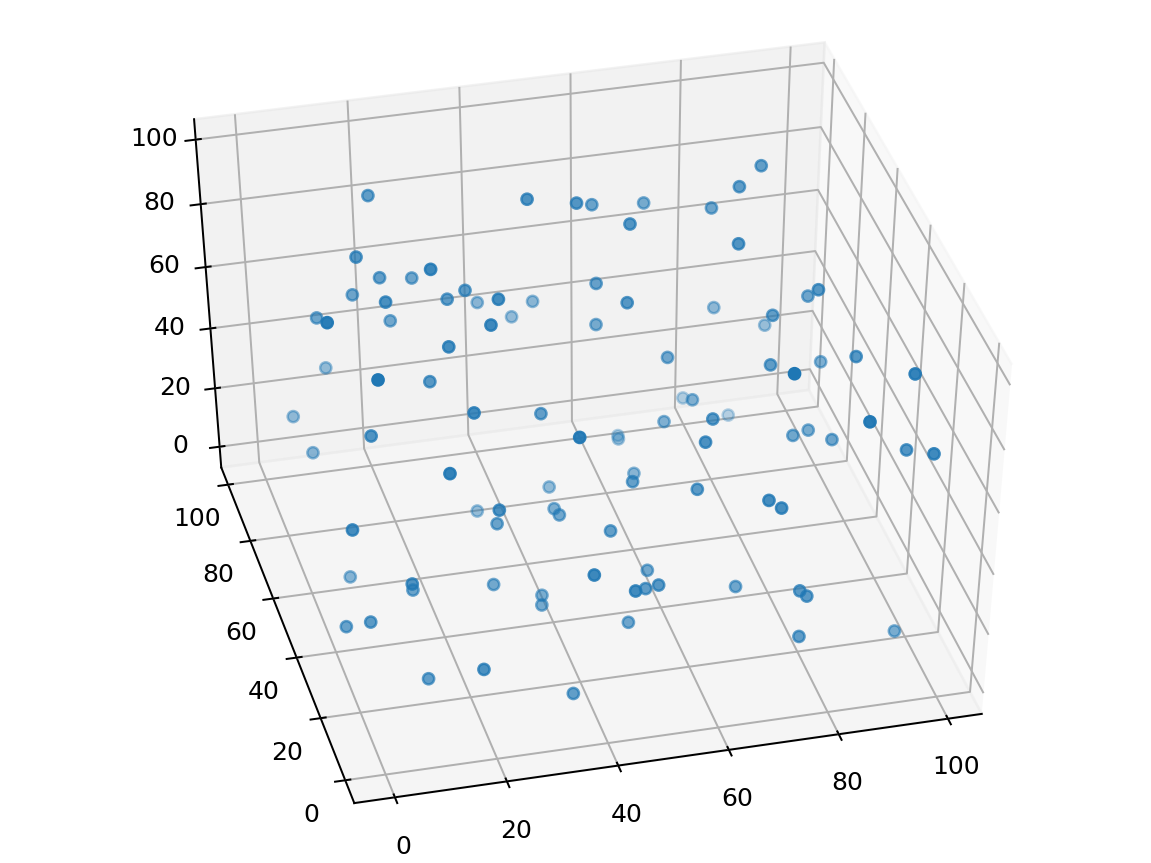

In [46]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib notebook

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = list(range(0, 100))
sequence_containing_y_vals = list(range(0, 100))
sequence_containing_z_vals = list(range(0, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()